<h1 style="font-weight:bold;"><i style="color:teal;">MACHINE LEARNING</i></h1>

<h5 style="font-weight:bold;"><i style="color:teal;">By:</i></h5>
<i style="color: black; font-weight:bold;"><br/> - Safae NABET<br/> - Hanae ELKORRI</i><br/><br/>

<h2 style="font-weight:bold;"><i style="color:tomato;">Classification using the KNN approach:</i></h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn

In [2]:
df = pd.read_csv("hotel_data.csv")
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_1,country_2,country_3,reservation_status_Check-Out,reservation_status_No-Show
0,0,1,0,342,2015,7,27,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,1,0,737,2015,7,27,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,2,1,0,7,2015,7,27,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,3,1,0,13,2015,7,27,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,4,1,0,14,2015,7,27,1,0,2,...,1,0,0,1,0,0,1,0,1,0


In [3]:
df.shape

(118898, 43)

In [4]:
X = df.drop(columns=["is_canceled"])

In [5]:
y = df["is_canceled"].values

y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [7]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 6)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [8]:
y_pred = knn.predict(X_test)

In [9]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [10]:
#check accuracy of the model on the test data
knn.score(X_test, y_test)

0.9608494533221195

In [11]:
from sklearn.metrics import r2_score, confusion_matrix
score = r2_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(score)
print(cm)

0.8322975124444362
[[14645   304]
 [  627  8204]]


In [12]:
precision1 = cm[1][1]/(cm[1][0]+cm[1][1])
rappel1 = cm[1][1]/(cm[0][1]+cm[1][1])
Fmesure1 = 2*(precision1*rappel1)/(precision1+rappel1)
print(precision1)
print(rappel1)
print(Fmesure1)

0.9290001132374589
0.9642689233662435
0.9463060153411383


In [13]:
precision0 = cm[0][0]/(cm[0][1]+cm[0][0])
rappel0 = cm[0][0]/(cm[1][0]+cm[0][0])
Fmesure0 = 2*(precision0*rappel0)/(precision0+rappel0)
print(precision0)
print(rappel0)
print(Fmesure0)

0.9796641915847214
0.9589444735463594
0.9691936070944046


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


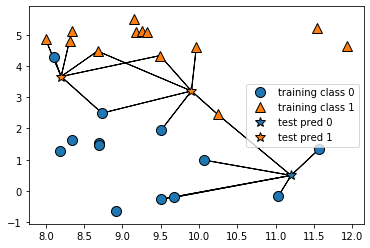

In [16]:
#KNN plot
mglearn.plots.plot_knn_classification(n_neighbors=6)
plt.show()